In [23]:
import snebeat.behav_tools as bat
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from glob import glob

mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

font = {'family' : 'Helvetica',
        'weight' : 'normal',
        'size'   : 16}

mpl.rc('font', **font)

In [10]:
path = '/Volumes/lab-kohlj/home/users/borakn/Data/Behaviour/Urine experiment'
files = glob(path + '/*_d*')
files.reverse()
files = files + glob(path + '/*_t*')

push_t = {}
retreat_t = {}

push_events = {}
retreat_events = {}

tt_duration = {}

for recording in files:
    name  = recording.split('_')[-1].split('.')[0]
    #conditions.append(name)
    
    num_episodes, bdf, events, fps = bat.preprocess_behaviour(recording)
    bdf = bdf.sum()
    
    push_t[name] = bdf['push'] / bdf['tube test'] * 100
    retreat_t[name] = bdf['retreat'] / bdf['tube test'] * 100
    tt_duration[name] = bdf['tube test'] / 30
    
    push_events[name] = int(num_episodes['push'])
    retreat_events[name] = int(num_episodes['retreat'])

nice_names = {'time0': 'Urine time 0',
             'time41min': 'Urine time 41min',
             'time1h23min': 'Urine time 1h:23min',
             'day0': 'Baseline day 0',
             'day-1': 'Baseline day -1',
             'day-2': 'Baseline day -2',
            }

conditions = []

for key in push_t.keys():
    conditions.append(nice_names[key])

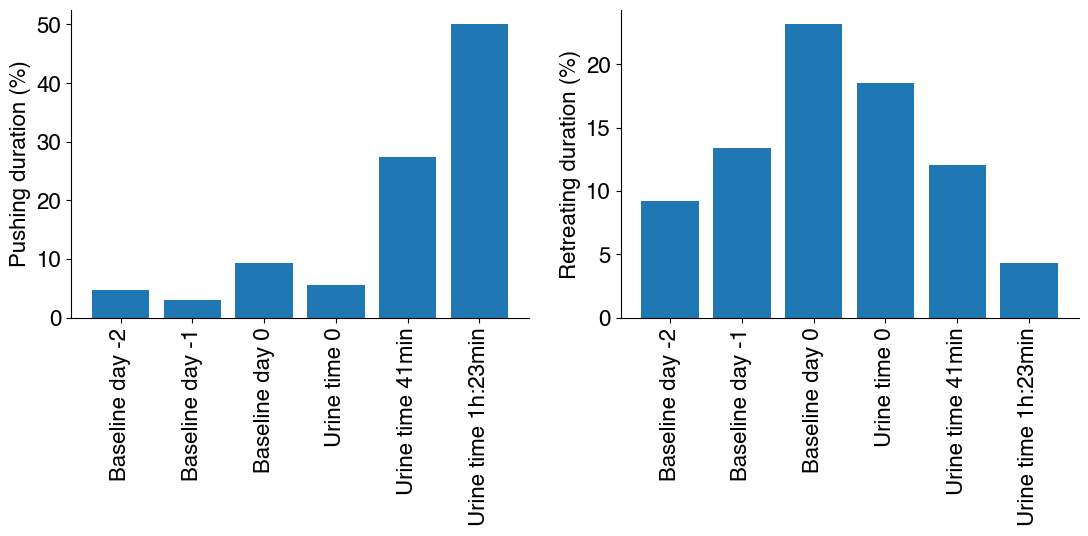

In [25]:
plt.figure(figsize=[13, 4])
plt.subplot(121)

plt.bar(np.arange(len(push_t)), push_t.values())

plt.ylabel('Pushing duration (%)')
plt.xticks(np.arange(len(push_t)), labels=conditions, rotation=90)

plt.subplot(122)
plt.bar(np.arange(len(retreat_t)), retreat_t.values())

plt.ylabel('Retreating duration (%)')
plt.xticks(np.arange(len(retreat_t)), labels=conditions, rotation=90)

plt.savefig('/Users/borakn/Documents/PhD/Plots/Behaviour/Urine painting/Tube test behaviours - duration.png', dpi=300, bbox_inches='tight')

Day -2 not accurate, different FPS to other conditions!!!


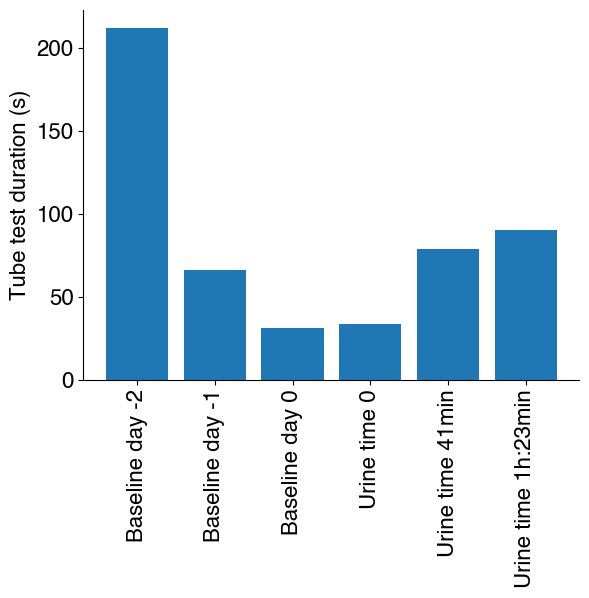

In [26]:
plt.bar(np.arange(len(tt_duration)), tt_duration.values())

plt.ylabel('Tube test duration (s)')
plt.xticks(np.arange(len(tt_duration)), labels=conditions, rotation=90)

print('Day -2 not accurate, different FPS to other conditions!!!')

plt.savefig('/Users/borakn/Documents/PhD/Plots/Behaviour/Urine painting/Tube test duration', dpi=300, bbox_inches='tight')

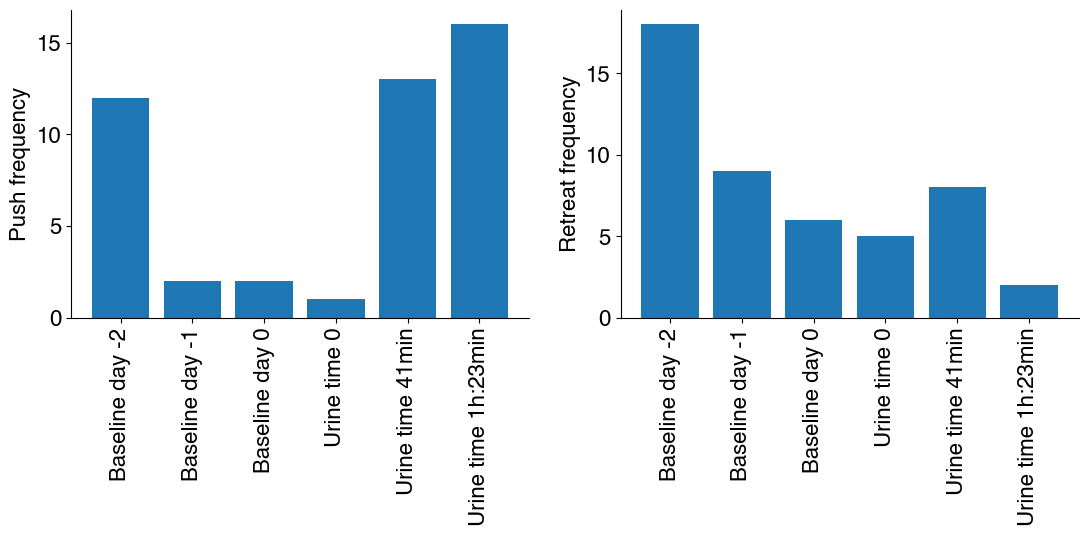

In [27]:
plt.figure(figsize=[13, 4])
plt.subplot(121)

plt.bar(np.arange(len(push_events)), push_events.values())

plt.ylabel('Push frequency')
plt.xticks(np.arange(len(push_events)), labels=conditions, rotation=90)

plt.subplot(122)
plt.bar(np.arange(len(retreat_events)), retreat_events.values())

plt.ylabel('Retreat frequency')
plt.xticks(np.arange(len(retreat_events)), labels=conditions, rotation=90)

plt.savefig('/Users/borakn/Documents/PhD/Plots/Behaviour/Urine painting/Tube test behaviours - frequency.png', dpi=300, bbox_inches='tight')